# Task: Price Range Analysis

In [3]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

#handle missing values
# Replace NaN values in 'Cuisines' column with the mode of the column
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
missing_values = df.isnull().sum()
print(missing_values)

# Convert categorical columns to 'category' type
categorical_columns = [ "Restaurant Name", "City", "Address", "Locality", "Locality Verbose","Cuisines", "Currency", "Rating color", "Rating text" ]
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert binary columns to boolean type (assuming "Yes"/"No" values)
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]
df[binary_columns] = df[binary_columns].map(lambda x: True if x == "Yes" else False)
print(df.dtypes)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID              int64
Restaurant Name         category
Country Code               int64
City                    category
Address                 category
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking           bool
Has Online d

### 1. Determining the most common price range among all the restaurants

In [15]:
most_common_price_range = df['Price range'].mode()[0]
print(f"Most common price range: {most_common_price_range}")

Most common price range: 1


### 2. Calculating the average rating for each price range

In [16]:
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print(f"Average rating for each price range:\n{average_rating_by_price_range}")

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


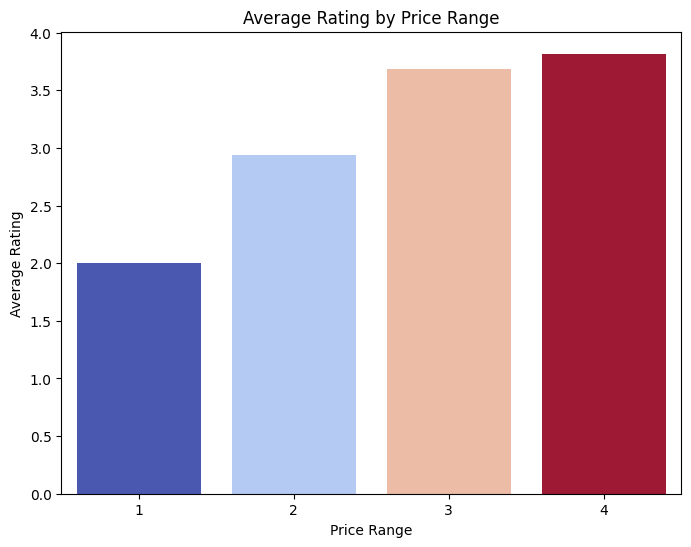

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Plot the average rating for each price range
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating_by_price_range.index, y=average_rating_by_price_range.values, hue=average_rating_by_price_range.index, palette='coolwarm', legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

### 3. Identifying the color representing the highest average rating among price ranges

In [20]:
# the price range with the highest average rating
highest_avg_rating_price_range = average_rating_by_price_range.idxmax()
highest_avg_rating = average_rating_by_price_range.max()

print(f"Price range with the highest average rating: {highest_avg_rating_price_range} with a rating of {highest_avg_rating}")

Price range with the highest average rating: 4 with a rating of 3.8179180887372017
